In [72]:
##Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## Datos


In [70]:
##Leo el archivo
Neural_Data=pd.read_csv("/home/lashmi/Documents/Neuro_tesis_Python/SD_Sensory.csv")

Neural_Data ##dataframe del csv tal cual me lo pasaron 5580 filas (1116*5) y 303 columnas (datos de las series de tiempo)

,Neuron,Duration,1,2,3,4,5,6,7,8,...,292,293,294,295,296,297,298,299,300,301
0,1,1,0.412661,0.413519,0.422540,0.438731,0.460629,0.486621,0.515196,0.545091,...,0.048672,0.036988,0.027785,0.021195,0.017237,0.015893,0.017151,0.021028,0.027556,0.036728
1,1,2,0.190615,0.165797,0.157546,0.164473,0.183567,0.210688,0.241153,0.270378,...,0.393977,0.447567,0.501409,0.551328,0.592787,0.621792,0.635670,0.633507,0.616131,0.585708
2,1,3,0.214400,0.262166,0.315875,0.367456,0.408658,0.433370,0.439408,0.429091,...,0.310969,0.310923,0.301055,0.280427,0.251605,0.220250,0.193668,0.178871,0.180752,0.200820
3,1,4,0.377221,0.327286,0.278166,0.235480,0.203989,0.185256,0.176397,0.171759,...,0.570939,0.576502,0.587128,0.600193,0.611821,0.617870,0.614901,0.601140,0.577882,0.550875
4,1,5,0.311600,0.205906,0.136682,0.119540,0.156648,0.237347,0.338790,0.431577,...,0.154552,0.159601,0.175929,0.219959,0.294974,0.386040,0.466427,0.511858,0.513816,0.483256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,1116,1,0.000686,0.001283,0.002319,0.004050,0.006833,0.011138,0.017542,0.026695,...,0.007265,0.011793,0.018492,0.028017,0.041010,0.057995,0.079239,0.104598,0.133401,0.164373
5576,1116,2,0.014265,0.024029,0.038497,0.058656,0.084999,0.117144,0.153546,0.191409,...,0.259194,0.231497,0.196642,0.158863,0.122067,0.089218,0.062056,0.041143,0.026154,0.016275
5577,1116,3,0.229612,0.263027,0.282362,0.285233,0.273342,0.252298,0.230076,0.214597,...,0.306080,0.336605,0.361299,0.385034,0.413235,0.448974,0.490665,0.531573,0.561568,0.570513
5578,1116,4,0.010855,0.009340,0.015972,0.032721,0.062765,0.107841,0.165204,0.226266,...,0.091662,0.046244,0.021054,0.008614,0.003156,0.001033,0.000301,0.000078,0.000018,0.000004


In [ ]:
##Acomodo los datos de otra manera (en una lista de matrices), cada matriz representa a un estimulo
estimulos= (1,2,3,4,5)

datos_por_estimulo=[] #Lista con las series de tiempo neuronales de las 1116 neuronas durante los 5 estímulos

for i in estimulos: ##Cada estimulo
    select_estim = Neural_Data.loc[Neural_Data['Duration'] == i] ##Me quedo con las series de tiempo de la tabla que pertenecen al estimulo i
    depurado=select_estim.drop(['Neuron','Duration'], axis=1) ##Quito dos columnas de la tabla, que tenian los nombres de las neuronas y del estimulo, me quedo solo con las series de tiempo 
    arreglo=pd.DataFrame(depurado).to_numpy() ##Convierto la tabla en una matriz de 1116X301
    datos_por_estimulo.append(arreglo) ## Guardo la matriz  en la lista

print(len(datos_por_estimulo)) #Una lista de 5 matrices, cada arreglo tiene la info de la actividad de 1116 neuronas durante un estimulo

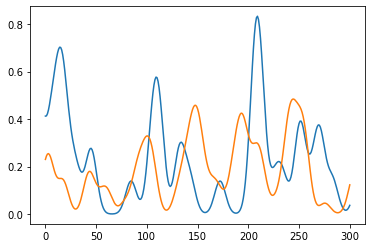

In [3]:
##Para visualizar la actividad neuronal durante el primer estimulo
tiempo= np.arange(0,301,1) 
plt.plot(tiempo,datos_por_estimulo[0][0]) ##Actividad neu 1 en estimulo 1
plt.plot(tiempo,datos_por_estimulo[0][1]) ##Actividad neu 2 en estimulo 1

## Binarización

In [5]:
##Binarización/discretización de los datos
from sklearn.preprocessing import KBinsDiscretizer

Series_discret = [] ##Lista que será igual a la de datos_por_estimulo pero ahora tendra matrices con las series de tiempo discretizadas

for i in datos_por_estimulo: ##Selecciono cada matriz de dentro de datos_por_estimulo
    arreglo_discretizado=np.zeros_like(i) ##Hago una matriz con las mismas dimesiones de la matriz seleccionada
    
    for neurona in range(0,len(i)): ##Recorro la matriz seleccionada
        X=i[neurona,:] ##Una fila de la matriz seleccionada, o sea la actividad de una neurona durante un estimulo
        
        #Discretizacion de la serie de tiempo de la neurona con la funcion KBins de sklearn
        est =KBinsDiscretizer(n_bins=12,encode='ordinal') 
        X=X.reshape(-1,1)
        est.fit(X)
        discret=est.transform(X)
        discret=discret.reshape(301)
        
        ##Serie discretizada
        arreglo_discretizado[neurona,:]=discret ##Guardo la serie de tiempo discretizada en la matriz nueva 
        
    Series_discret.append(arreglo_discretizado) ##Una vez que llene la nueva matriz con las series de tiempo discretizadas de las 1116 neuronas, guardo la matrz

/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/sit

/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/sit

/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/sit

/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/sit

/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/sit

/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/sit

/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:194: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserW

/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/lashmi/anaconda3/lib/python3.9/sit

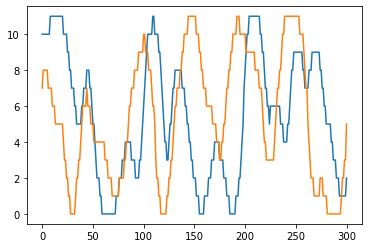

In [6]:
##Visualizar las series de tiempo de arriba en su forma discreta
plt.plot(tiempo,Series_discret[0][0])
plt.plot(tiempo,Series_discret[0][1])

## Cálculo de información mutua

In [13]:
##Cálculo de información mutua entre capas
from sklearn import metrics

keys=('E1','E2','E3','E4')

MI_entrecapas= {'E1':[], 'E2':[],'E3':[], 'E4':[]} ##Diccionario en donde voy a guardar las matrices de infomrcion mutua

for i in range (0,len(keys)):
    estimulo_adelante = i+1 ##Recorro los estimulos i= estimulo actual , estimulo adelante= uno adelante de i
    while estimulo_adelante < 5:
        
        ##Elijo las capas a comparar
        capa_i=Series_discret[i]
        capa_j=Series_discret[estimulo_adelante]
        
        #MAtriz en donde voy a guardar info mutua entre neuronas de cada capa
        MI=np.zeros((1116,1116))
        
        ##Recorrido por las neuronas
        for n in range(0,len(capa_i)):
            Neu_fija=capa_i[n] ##Neurona x capa i
            for m in range(0,len(capa_j)):
                Neu_movil=capa_j[m] ##Neurona y capa j
                           
                ##Cálculo valores de información mutua           
                InfoMut=metrics.mutual_info_score(Neu_fija,Neu_movil) 
                
                ##Guardo informacón mutua
                MI[n][m]= InfoMut
                           
        ##Cuando ya se llenó la matriz, se guarda
        MI_entrecapas[keys[i]].append(MI)
        estimulo_adelante += 1 

0 1
0 2
0 3
0 4
1 2
1 3
1 4
2 3
2 4
3 4


In [73]:
## Guardar datos de información mutua
import os
import pickle
os.chdir('/home/lashmi/Documents/Neuro_tesis_Python') 
with open('MI_entrecapas(SENSORIAL).pickle', 'wb') as fh: 
    pickle.dump(MI_entrecapas,fh)
    
##Abrir los datos de IM guardados    
MI_entrecapas=pickle.load(open("MI_entrecapas(SENSORIAL).pickle",'rb')) 

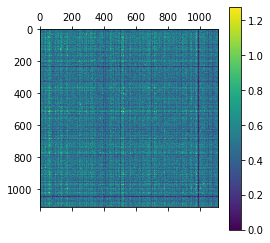

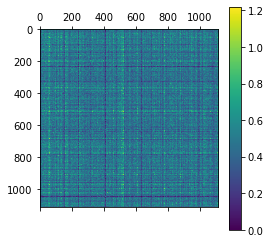

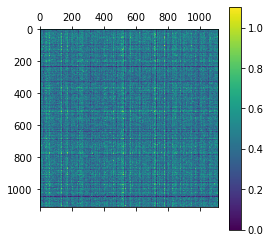

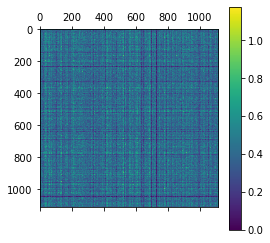

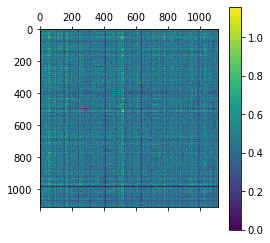

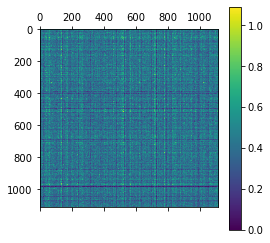

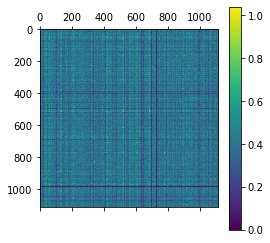

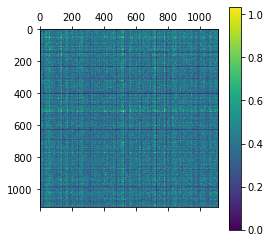

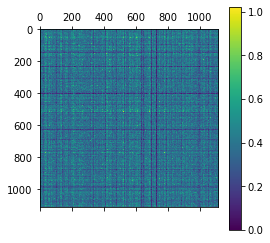

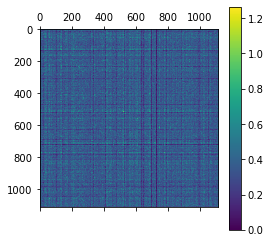

In [8]:
##Visualizar matrices de información mutua

for matriz in MI_entrecapas['E1']: ##Contiene 4 matrcies (estimulo 1 vs estimulos 2,3,4 y 5)
    plt.matshow(matriz)
    plt.colorbar()
    
for matriz in MI_entrecapas['E2']:##Contiene 3 matrices (estimulo 2 vs estimulos,3,4,5)
    plt.matshow(matriz)
    plt.colorbar()
    
for matriz in MI_entrecapas['E3']:##Contiene 2 matrices (estimulo 3 vs estimulos 4,5)
    plt.matshow(matriz)
    plt.colorbar()
    
for matriz in MI_entrecapas['E4']:##Contiene 1 matriz (estimulo 4 vs estimulo 5)
    plt.matshow(matriz)
    plt.colorbar()

## Creación de las matrices de adyacencia

In [74]:
keys=('E1','E2','E3','E4')
Mady_entrecapas= {'E1':[], 'E2':[],'E3':[], 'E4':[]} #Diccionario en donde voy a guardar las matrices de adyacencia
cuantil= 0.9

for key in keys:
    intervalo_actual=MI_entrecapas[key] ##Matriz de info mutua entre un estimulo y otro
    for i in intervalo_actual:
        matriz=i #Selecciono una matriz de info mutua
        M_ady=np.zeros_like(i) ##Hago una matriz de las mismas dimensiones que la seleccionada
        qn=np.quantile(matriz,cuantil, axis =None) ##Calculo del cuantil 0.9
        
        ##Recorro la matriz seleccionada
        for j in range(0,len(matriz)):
            for k in range (0,len(matriz)):
                
                im_value=matriz[j][k] #Valor de informacion mutua
                
                if im_value > qn: #Si el valor de información mutua supera al cuantil
                    
                    M_ady[j][k]=1  #Se considera que esas neuronas están conectadas
                    
        Mady_entrecapas[key].append(M_ady)##Guardo la matriz de adyacencia 

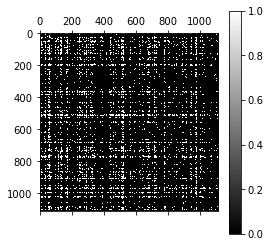

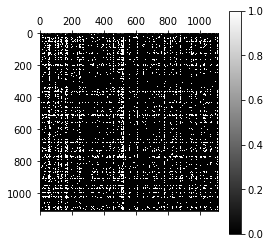

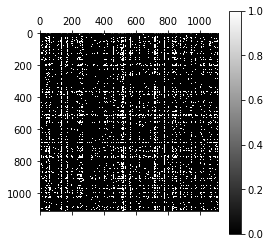

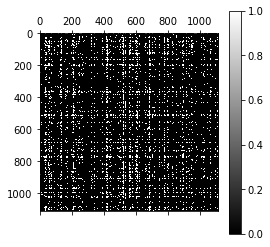

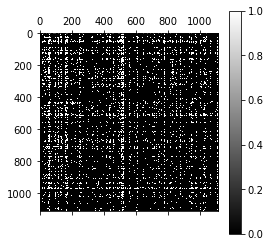

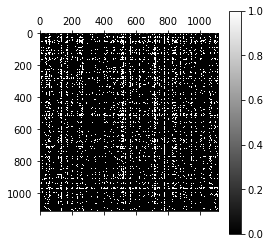

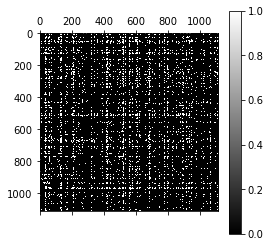

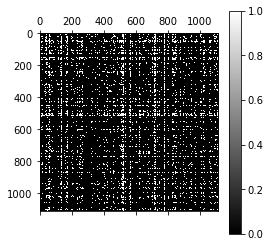

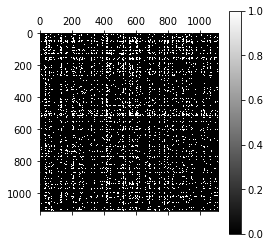

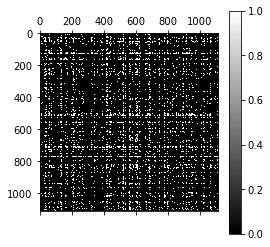

In [11]:
##Visualizar matrices de adyacencia entre capas

for matriz in Mady_entrecapas['E1']:
    plt.matshow(matriz,cmap='gray')
    plt.colorbar()
    
for matriz in Mady_entrecapas['E2']:
    plt.matshow(matriz,cmap='gray')
    plt.colorbar()
    
for matriz in Mady_entrecapas['E3']:
    plt.matshow(matriz,cmap='gray')
    plt.colorbar()
    
for matriz in Mady_entrecapas['E4']:
    plt.matshow(matriz,cmap='gray')
    plt.colorbar()

## Pesos y normalizacion

**Multiplex**

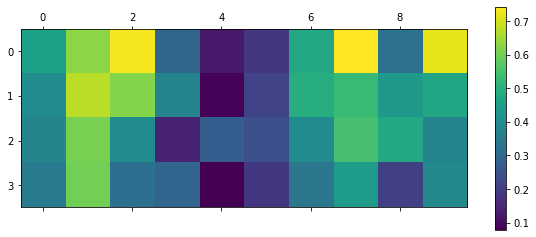

In [75]:
##Multiplex: Capas adyacentes

##Selecciono las matrices de informacion mutua de las capas adyacentes y las guardo en una lista 
                    ##Ejemplo matriz de info mutua de estimulo 1 vs estimulo 2
capas_adyacentes_mplx=(MI_entrecapas['E1'][0],MI_entrecapas['E2'][0],MI_entrecapas['E3'][0],MI_entrecapas['E4'][0]) 

##Hago una matriz con 1116 columnas y una fila, llena de ceros
enlaces_entre_capa_mplx=np.zeros((1116,))

for mat in capas_adyacentes_mplx: ##recorro la lista donde estan las matrices de capas adyacentes
    diagonal=mat.diagonal() ##Me quedo solo con los valores de la diagonal de la matrix
    enlaces_entre_capa_mplx=np.vstack((enlaces_entre_capa_mplx,diagonal)) ##Agregro la diagonal con la matriz llena de 0 porque tiene la misma forma
    
enlaces_entre_capa_mplx = np.delete(enlaces_entre_capa_mplx, 0, 0) ##MAtriz con los valores de informacion mutua entre neuronas de capas adyacentes

##Visualizacion
plt.matshow(enlaces_entre_capa_mplx[:,:10])
plt.colorbar()

In [76]:
##Normalizacion de los pesos

##Primero cargo los datos de la informacion mutua entre neuronas de la misma capa (se hizo el mismo procedimiento que con las series de tiempo entre capas, primero se discretizó , luego se guardaron los valoresde información mutua en matrices y esas matrices en una lista)
MI_mismacapa=pickle.load(open("MI_mismacapa(SENSORIAL).pickle",'rb')) 

##Junto datos para normalizacion
datos_juntos=np.vstack((MI_mismacapa[0],MI_mismacapa[1]))
datos_juntos=np.vstack((datos_juntos,MI_mismacapa[2]))
datos_juntos=np.vstack((datos_juntos,MI_mismacapa[3]))
datos_juntos=np.vstack((datos_juntos,MI_mismacapa[4]))
datos_juntos=np.vstack((datos_juntos,enlaces_entre_capa_mplx))

print(datos_juntos.shape)

##Valores minimo y maximo de informacion mutua de todas las matrices juntas (de todas las capas)
minimo=np.min(datos_juntos)
maximo=np.max(datos_juntos)

print(minimo,maximo)

##Normalizacion de los datos
Matrices_norm2_mismacapa=[] ##Para guardar las matrices normalizadas

for matriz in MI_mismacapa: ##Selecciono matriz de informacion mutua entre neuronas de la misma capa
    x=np.copy(matriz) ##Hago una copia de la matriz seleccionada
    norm=(x-minimo)/(maximo-minimo) ##Normalizacion a todos los valores de la matriz seleccionada
    Matrices_norm2_mismacapa.append(norm) ##Guardo la matriz de valores normalizados
    
##Normalizacion de los datos
Matrices_norm2_entrecapas=[]##Para guardar las matrices normalizadas

for matriz in capas_adyacentes_mplx: ##Selecciono matriz de informacion mutua entre neuronas de capas adyacentes
    x=np.copy(matriz) ##Hago una copia de la matriz seleccionada 
    norm=(x-minimo)/(maximo-minimo)##Normalizacion a todos los valores de la matriz seleccionada
    Matrices_norm2_entrecapas.append(norm)##Guardo la matriz de valores normalizados

(5584, 1116)
0.0 1.27755479452581


In [77]:
##MAtrices de adyacencia de la misma capa (Hago las matrices de adyacencia entre neuronas de la misma capa)
Matrices_ady=[]
cuantil= 0.9   #Cuantil elegido, si la información mutua tiene un valor que supera al cuantil 0.90 hay conexión

##Crear matrices de adyacencia
for matriz in MI_mismacapa: ##Selecciono matriz de informacion mutua 
    M_ady=np.zeros_like(matriz) ##Hago una matriz de las mismas dimensiones que la matriz seleccionada pero llena de ceros
    qn=np.quantile(matriz,cuantil, axis =None) ##Calculo el cuantil
    
    ##Recorro la matriz seleccionada
    for j in range(0,len(matriz)):
            for k in range (0,len(matriz)):
                
                if matriz[j][k] > qn: ##Si el valor de info mutua entre las neuronas j y k supera el cuantil 0.90
                    
                    M_ady[j][k]=1 ##Esas neuronas se consideran conectadas en la matriz de adyacencia
                    
    Matrices_ady.append(M_ady) ##Guardo la matriz de adyacencia
    
##Obtener enlaces a partir de las matrices de adyacencia
Enlaces_totales_mismacapa=[] #0.9

for matriz in Matrices_ady: ##Selecciono matriz de adyacencia
    filas, columnas= matriz.shape ##Cuantas filas y cuantas columnas tiene la matriz de adyacencia (1116x1116)
    
    Pares_conectados=[] ##Lista en donde guardo los pares conectados del estimulo actual
    ##Recorro la matriz seleccionada
    for i in range (0,filas):
        for j in range (0,columnas):
            
            if matriz[i][j] == 1: ##Si en la matriz de adyacenia las neuronas i,j están conectadas
                Pares_conectados.append((i,j))## En pares conectados, guardo una lista con los numeros de i,j
                
    Enlaces_totales_mismacapa.append(Pares_conectados) ##Cuando acabe de recorrer una matriz de adyacencia y de obtener todas las parejas conectadas, guardo la lista de parejas conectadas

In [78]:
##Obtención de peso de enlaces a partir de las matrices normalizadas
Enlaces_norm2=[[],[],[],[],[],
               [],[],[],[] ] ##Para guardar en una lista, todas las parejas conectadas y sus pesos de conexión

##Junto las matrices de info mutua normalizada (las de la misma capa con las entre capa)
x=Matrices_norm2_mismacapa.copy()
x.extend(Matrices_norm2_entrecapas)



##Peso de enlaces misma capa
for i in range (5): ##5 porque son 5 estimulos
    
    for enlace in Enlaces_totales_mismacapa[i]: ##Enlaces en el estimulo x
        
        valor=x[i][enlace[0]][enlace[1]] ##Busco el valor del peso del enlace en la matriz y subindices correspondientes
        
        Enlaces_norm2[i].append((enlace[0],enlace[1],round(valor,2)))   ##Guardo el enlace y su peso

**Multicapa**

In [79]:
##Apilo todas las matrices de informacion mutua para obtener el maximo y minimo valor para la normalizacion
apila=np.vstack((MI_mismacapa[0],MI_mismacapa[1]))
apila=np.vstack((apila,MI_mismacapa[2]))
apila=np.vstack((apila,MI_mismacapa[3]))
apila=np.vstack((apila,MI_mismacapa[4]))

apila=np.vstack((apila,MI_entrecapas['E1'][0]))
apila=np.vstack((apila,MI_entrecapas['E1'][1]))
apila=np.vstack((apila,MI_entrecapas['E1'][2]))
apila=np.vstack((apila,MI_entrecapas['E1'][3]))

apila=np.vstack((apila,MI_entrecapas['E2'][0]))
apila=np.vstack((apila,MI_entrecapas['E2'][1]))
apila=np.vstack((apila,MI_entrecapas['E2'][2]))

apila=np.vstack((apila,MI_entrecapas['E3'][0]))
apila=np.vstack((apila,MI_entrecapas['E3'][1]))

apila=np.vstack((apila,MI_entrecapas['E4'][0]))

##maximo y minimo
min_total=np.min(apila)
max_total=np.max(apila)

print(min_total, max_total)


0.0 1.27755479452581


In [80]:
##Normalización
Matnorm_mismacapa_Multicapa=[] ##Aqui guardare las matrices de informacion mutua entre neuronas de la misma capa, con valores normalizados

for matriz in MI_mismacapa: ##Voy de matriz en matrix
    x=np.copy(matriz) ##HAgo una copia de la matriz seleccionada
    norm=(x-min_total)/(max_total-min_total) ##Normalizacion
    Matnorm_mismacapa_Multicapa.append(norm) ##GUardo la matriz de valores normalizados
    
Matricesnorm_entrecapas_Multicapa=[] ##PAra guardar matrices de informacion mutua entre capas con valores normalizados

for estim in keys:  ##Recorrido de los estimulos 
    for matriz in MI_entrecapas[estim]: ##Selecciono matriz de informacion mutua
        x=np.copy(matriz)#Hago una copia de la matriz seleccionada
        norm=(x-min_total)/(max_total-min_total) ##Normalizacion
        Matricesnorm_entrecapas_Multicapa.append(norm) ##GUardo la matriz de valores normalizados

In [81]:
##Lista de enlaces entre capas
Enlaces_Totales_Multicapa={'E1':[],'E2':[],'E3':[],'E4':[]} ##Diccionario para guardar el total de enlaces 

for estim in keys:   ##Recorrido de los estimulos
    for matriz in Mady_entrecapas[estim]: ##Selecciono matriz de adyacencia previamente creada
        
        filas, columnas= matriz.shape ##Cuantas filas y cuantas columnas tiene la matriz de adyacencia (1116x1116)
        Pares_conectados=[] #Lista para guardar a parejas de neuronas conectadas
        ##Recorro matriz seleccionada
        for i in range (0,filas):
            for j in range (0,columnas):
                
                if matriz[i][j] == 1: #SI las neuronas i,j estan conectadas en la matriz
                    Pares_conectados.append((i,j)) ##Guardo los nombres de las neuronas i,j, en pareja dentro de la lista 
        Enlaces_Totales_Multicapa[estim].append(Pares_conectados) ##GUardo lista con todas los pares conectados en un estimulo dentro de otra lista
        

In [82]:
##Agrego pesos a los enlaces

##Enlaces de la Multicapa
Enlaces_pesados_Multicapa=[[],[],[],[],[],   # Las primeras 5 listas son los enlaces dentro de una misma capa
                                             #Las siguientes listas son los enlaces entre capas:  
                          [],[],[],[],       #E1 vs 2,3,4,5
                          [],[],[],          #E2 vs 3,4,5
                          [],[],             #E3 vs 4,5
                          []]                #E4 vs 5

##Una lista en donde junto todas las matrices normalizadas que tengo
enlaces_normalizados_multicapa= Matnorm_mismacapa_Multicapa
enlaces_normalizados_multicapa.extend(Matricesnorm_entrecapas_Multicapa)

##Peso de enlaces misma capa
for i in range (5):
    for enlace in Enlaces_totales_mismacapa[i]: ##Recorro cada enlace de un estimulo
        valor=enlaces_normalizados_multicapa[i][enlace[0]][enlace[1]]##El valor normalizado de ese enlace
        Enlaces_pesados_Multicapa[i].append((enlace[0],enlace[1],round(valor,2)))  #guardo en una lista, el enlace y su peso
        
#Peso de enlaces entre capas
for i in range(5,15):
    for enlace in Enlaces_Totales_Multicapa_juntos[(i-5)]: ##Recorro cada enlace de un estimulo
        valor=enlaces_normalizados_multicapa[i][enlace[0]][enlace[1]]##El valor normalizado de ese enlace
        Enlaces_pesados_Multicapa[i].append((enlace[0],enlace[1],round(valor,2)))#guardo en una lista, el enlace y su peso

## Creacion de csv para pasar info a R

In [ ]:
##Multiplex
with open ("enlacesmplx_chequeo_R.csv", "w") as f: ##Abro el csv
    f.write("node.from"+","+"layer.from"+","+"node.to"+","+"layer.to"+","+"weight") ##Pongo titulos
    f.write("\n") ##Salto de linea
    
    #Parte 1 enlaces misma capa
    capa=1
    for i in range (len(Enlaces_norm2[0:5])): ##Los enlaces dentro de una misma capa de los 5 estimulos
        
        info_enlaces=Enlaces_norm2[i] #Lisa con los enlaces de una sola capa (1 solo estimulo)
        
        for j in range(len(info_enlaces)): ##recorro los enlaces 
            enlace=info_enlaces[j] ##enlace entre un par de neuronas
            
            #lo escribo en el csv, el nodo, de que capa es, a que no va, en que capa está ese nodo, el peso del enlace
            f.write(str(enlace[0]+1)+","+str(capa)+","+str(enlace[1]+1)+","+str(capa)+","+str(enlace[2]))
            
            f.write("\n") #salto de linea
            
        capa+=1 ##Siguiente capa
        
    #Parte 2 enlaces entre capa para multiplex    
    capa=1
    f.write("\n") #salto de linea
    for i in range(4):
        for j in range(1116): ##Todas las neuronas
            
            #EScribo los enlaces de las neuronas consigo mismas en la capa adyacente , con todo y peso el enlace
            f.write(str(j+1)+","+str(capa)+","+str(j+1)+","+str(capa+1)+","+str(round(Matrices_norm2_entrecapas[i][j][j],2)))
            f.write("\n") #salto de linea
            
            #Escribo el enlace de regreso
            f.write(str(j+1)+","+str(capa+1)+","+str(j+1)+","+str(capa)+","+str(round(Matrices_norm2_entrecapas[i][j][j],2)))
            f.write("\n") #salto de linea
        capa+=1 #Siguiente capa


In [ ]:
##Multicapa
##Paso los datos de la Multicapa a R

with open ("enlacesMulticapa_chequeo_R.csv", "w") as f: ##Abro el csv
    f.write("node.from"+","+"layer.from"+","+"node.to"+","+"layer.to"+","+"weight")##Pongo titulos
    f.write("\n")  #salto de linea
    
    #Parte 1: enlaces en la misma capa
    capa=1
    for i in range (len(Enlaces_pesados_Multicapa[0:5])): ##Los enlaces de dentro de cada capa
        info_enlaces=Enlaces_pesados_Multicapa[i] ##Enlaces de dentro de una capa especifica
        
        for j in range(len(info_enlaces)):
            enlace=info_enlaces[j] ##Enlace especifico
            
            ##Escribo el enlace especifico seleccionado, en este caso capa de salida y entrada son la misma
                    #nodo de salida      #capa de salida  #nodo entrada   #capa entrada   #peso
            f.write(str(enlace[0]+1)+","+str(capa)+","+str(enlace[1]+1)+","+str(capa)+","+str(enlace[2]))
            f.write("\n")  #salto de linea
        capa+=1
        
    #Parte 2: enlaces entre capa
    ubicacion_capas=((1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5))
    
    f.write("\n") #salto de linea
    
    for i in range (5,15):
        info_enlaces=Enlaces_pesados_Multicapa[i] ##Los enlaces entrecapas de cada capa
        capa1,capa2=ubicacion_capas[(i-5)] ##que capas se estan conectando
        
        for j in range(len(info_enlaces)):
            enlace=info_enlaces[j] ##Enlace especifico
            
            ##Escribo los enlaces entre capas de ida y de regreso
            
            #nodo de salida      #capa de salida  #nodo entrada   #capa entrada   #peso
            f.write(str(enlace[0]+1)+","+str(capa1)+","+str(enlace[1]+1)+","+str(capa2)+","+str(enlace[2]))
            f.write("\n") #salto de linea
            
            #nodo de salida      #capa de salida  #nodo entrada   #capa entrada   #peso
            f.write(str(enlace[1]+1)+","+str(capa2)+","+str(enlace[0]+1)+","+str(capa1)+","+str(enlace[2]))
            f.write("\n") #salto de linea

##  Tabla de info que le pase a R

In [84]:
##Multiplex
tabla_mplx=pd.read_csv('enlacesmplx_chequeo_R.csv') ##Leo el csv que cree para R con pandas
tabla_mplx ##Los datos de enlaces y peso de la tabla multiplex

,node.from,layer.from,node.to,layer.to,weight
0,1,1,4,1,0.53
1,1,1,46,1,0.55
2,1,1,63,1,0.55
3,1,1,88,1,0.54
4,1,1,185,1,0.54
...,...,...,...,...,...
631651,1114,5,1114,4,0.27
631652,1115,4,1115,5,0.23
631653,1115,5,1115,4,0.23
631654,1116,4,1116,5,0.21


In [32]:
##Multicapa
tabla_multicapa=pd.read_csv('enlacesMulticapa_chequeo_R.csv') ##Leo el csv que cree para R con pandas
tabla_multicapa ##Los datos de enlaces y peso de la tabla multicapa

,node.from,layer.from,node.to,layer.to,weight
0,1,1,4,1,0.53
1,1,1,46,1,0.55
2,1,1,63,1,0.55
3,1,1,88,1,0.54
4,1,1,185,1,0.54
...,...,...,...,...,...
3113629,968,5,1116,4,0.36
3113630,1116,4,973,5,0.36
3113631,973,5,1116,4,0.36
3113632,1116,4,997,5,0.41


## Distribuciones de grado

In [85]:
##Multiplex 
capa1=tabla_mplx.loc[(tabla_mplx['layer.from']==1)] ##Me quedo solo con los enlaces que salen de la capa 1
capa1

,node.from,layer.from,node.to,layer.to,weight
0,1,1,4,1,0.53
1,1,1,46,1,0.55
2,1,1,63,1,0.55
3,1,1,88,1,0.54
4,1,1,185,1,0.54
...,...,...,...,...,...
624950,1112,1,1112,2,0.37
624952,1113,1,1113,2,0.39
624954,1114,1,1114,2,0.44
624956,1115,1,1115,2,0.35


In [86]:
capa2=tabla_mplx.loc[(tabla_mplx['layer.from']==2)] ##Me quedo solo con los enlaces que salen de la capa 2
capa3=tabla_mplx.loc[(tabla_mplx['layer.from']==3)]##Me quedo solo con los enlaces que salen de la capa 3
capa4=tabla_mplx.loc[(tabla_mplx['layer.from']==4)]##Me quedo solo con los enlaces que  salen de la capa 4
capa5=tabla_mplx.loc[(tabla_mplx['layer.from']==5)]##Me quedo solo con los enlaces que salen de la capa 5

capas_mplx=(capa1,capa2,capa3,capa4,capa5) ##Guardo la informacion en una lista 

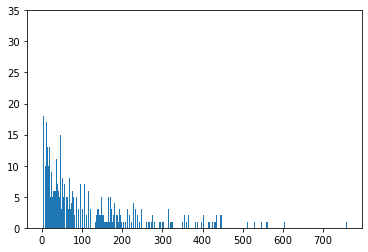

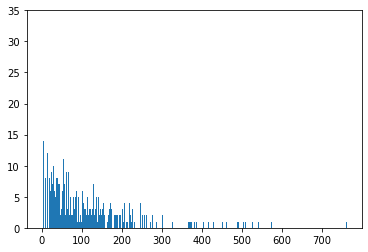

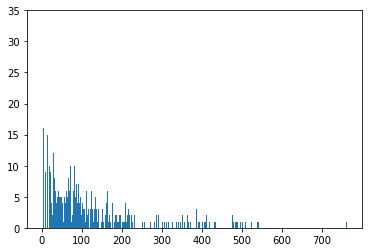

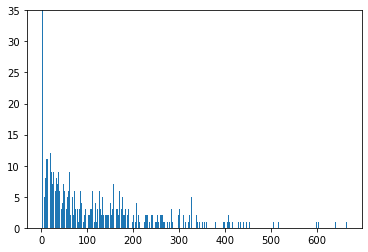

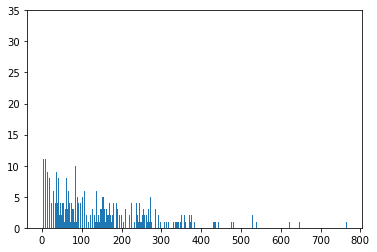

In [88]:
##Distribuciones de grado multiplex

for capa in capas_mplx: ##De capa en capa 
    
    grado_nodos=list(capa['node.from'].value_counts()) ##Cuento cuantas veces aparece el nombre de un nodo en la columna 'node.from', eso me da un valor de grado para cada nodo
    unicos=np.unique(np.array(grado_nodos)) ##Cuales son todos los valores de grado que aparecen, sin repetir
    agrupo=[grado_nodos.count(i) for i in unicos] ##Cuantas veces aparece un mismo valor de grado
    #Graficar
    plt.bar(unicos,agrupo)
    plt.ylim(0,35)
    plt.show()

In [47]:
###Multicapa
capa1_multi=tabla_multicapa.loc[(tabla_multicapa['layer.from']==1)]  ##Me quedo solo con los enlaces que salen de la capa 1
capa2_multi=tabla_multicapa.loc[(tabla_multicapa['layer.from']==2)]  ##Me quedo solo con los enlaces que salen de la capa 2
capa4_multi=tabla_multicapa.loc[(tabla_multicapa['layer.from']==4)]  ##Me quedo solo con los enlaces que salen de la capa 3
capa3_multi=tabla_multicapa.loc[(tabla_multicapa['layer.from']==3)] ##Me quedo solo con los enlaces que salen de la capa 4
capa5_multi=tabla_multicapa.loc[(tabla_multicapa['layer.from']==5)] ##Me quedo solo con los enlaces que salen de la capa 5

capas_multicapa=(capa1_multi,capa2_multi,capa3_multi,capa4_multi,capa5_multi)

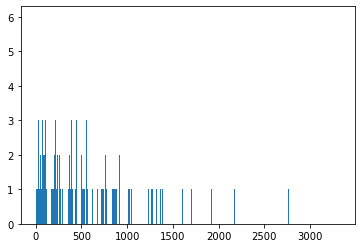

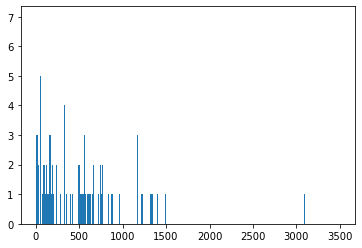

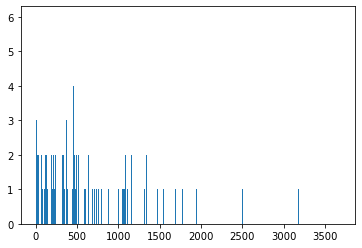

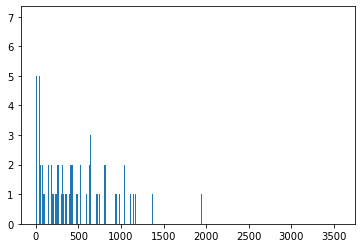

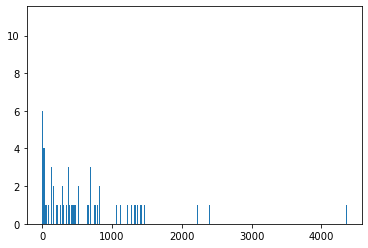

In [49]:
for capa in capas_multicapa:##De capa en capa 
    grado_nodos=list(capa['node.from'].value_counts()) ##Cuento cuantas veces aparece el nombre de un nodo en la columna 'node.from', eso me da un valor de grado para cada nodo
    unicos=np.unique(np.array(grado_nodos)) ##Cuales son todos los valores de grado que aparecen, sin repetir
    agrupo=[grado_nodos.count(i) for i in unicos] ##Cuantas veces aparece un mismo valor de grado
    ##Graficar
    plt.bar(unicos,agrupo)
    plt.show()